In [1]:
import os

fonts_folder = "./fonts"
def get_ttf_files(folder):
    ttf_files = []

    for dirpath, dirnames, filenames in os.walk(folder):
        for filename in [f for f in filenames if f.endswith(".ttf")]:
            ttf_files.append(os.path.join(dirpath, filename))

    return ttf_files

ttf_files = get_ttf_files(fonts_folder)
print(ttf_files)

['./fonts/Caveat-Medium.ttf', './fonts/Comfortaa-Regular.ttf', './fonts/RobotoMono-ExtraLightItalic.ttf', './fonts/Comfortaa-Bold.ttf', './fonts/RobotoMono-Thin.ttf', './fonts/Pangolin-Regular.ttf', './fonts/Caveat-SemiBold.ttf', './fonts/RobotoMono-Light.ttf', './fonts/Comfortaa-Medium.ttf', './fonts/Comfortaa-SemiBold.ttf', './fonts/Caveat-Regular.ttf', './fonts/RobotoMono-SemiBoldItalic.ttf', './fonts/RobotoMono-LightItalic.ttf', './fonts/RobotoMono-Bold.ttf', './fonts/Alice-Regular.ttf', './fonts/RobotoMono-BoldItalic.ttf', './fonts/Lobster-Regular.ttf', './fonts/RobotoMono-ThinItalic.ttf', './fonts/RobotoMono-Regular.ttf', './fonts/RobotoMono-Italic.ttf', './fonts/Caveat-Bold.ttf', './fonts/RobotoMono-ExtraLight.ttf', './fonts/RobotoMono-SemiBold.ttf', './fonts/RubikDirt-Regular.ttf', './fonts/RobotoMono-Medium.ttf', './fonts/Pacifico-Regular.ttf', './fonts/RobotoMono-MediumItalic.ttf', './fonts/Comfortaa-Light.ttf']


In [2]:
!mkdir -p ../../PaddleOCR_Mukhtar/train_data/rec/synthetic/img

In [9]:
!rm ./images/*Zone.Identifier

  0%|          | 0/10 [00:00<?, ?it/s]

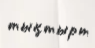

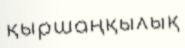

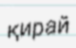

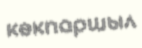

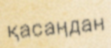

 50%|█████     | 5/10 [00:00<00:00, 48.90it/s]

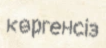

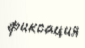

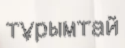

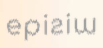

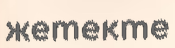

100%|██████████| 10/10 [00:00<00:00, 51.82it/s]


In [11]:
import sys
sys.path.insert(0, '..')
from trdg.generators import GeneratorFromDict

generator = GeneratorFromDict(
    blur=1,
    length=1,
    random_blur=True,
    random_skew = True,
    skewing_angle=5,
    image_dir="./images",
    background_type=3,
    size=48,
    distorsion_type=3,
    # text_color="#000000",
    # fit=True,
    path="./kk_dict.txt",
    text_colors=["#282828", "#000000", "#333333", "#666666", "#999999"],
    fonts=ttf_files,
    stroke_widths=[0, 1],
    space_widths=[1.0],
    character_spacings=[-1, 0, 1, 2, 3],
    stroke_fills=["#282828", "#000000", "#333333", "#666666", "#999999"],
)

from tqdm import tqdm
train_folder = "../../PaddleOCR_Mukhtar/train_data/rec/synthetic/"
relative_train_folder = "./train_data/rec/synthetic/"

# Define train and test split
train_test_split = 1000

image_count = 21000

with open(f"{train_folder}synthetic_test.txt", "w") as test_file, open(f"{train_folder}synthetic_train.txt", "w") as train_file:
    for idx in tqdm(range(image_count)):
        (img, lbl) = generator.next()
        file_name = f"word_{str(idx).zfill(3)}.jpg"
        file_path = f"{train_folder}img/{file_name}"
        img.save(file_path)

        if idx < train_test_split:
            # Write to test file
            test_file.write(f"{file_name}\t{lbl}\n")
        else:
            # Write to train file
            train_file.write(f"{file_name}\t{lbl}\n")